<a href="https://colab.research.google.com/github/andresaraque28/Prediccion-De-lluvias-Tundama/blob/main/Cocreacion_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_precipitaciones  = pd.read_csv( "precipitaciones.csv")
df_precipitaciones.head()

,latitude,longitude,municipality,year,month,precip
0,4.674999,-73.175003,San Luis De Gaceno,1981,1,24.66108
1,4.674999,-73.175003,San Luis De Gaceno,1981,2,238.47923
2,4.674999,-73.175003,San Luis De Gaceno,1981,3,141.27191
3,4.674999,-73.175003,San Luis De Gaceno,1981,4,522.77313
4,4.674999,-73.175003,San Luis De Gaceno,1981,5,581.35980


In [ ]:
# Crear un dataframe con los datos mensuales de todos los municipios que conforman la provincia del Tundama
municipios_elegidos = ['Belén', 'Duitama', 'Busbanzá', 'Cerinza', 'Corrales', 'Floresta',
                       'Paipa', 'Santa Rosa De Viterbo', 'Tutazá']

# Lista para almacenar los dataframes
df_list = []

# Itera sobre cada municipio
for municipio_elegido in municipios_elegidos:
    # Filtra los datos para el municipio elegido
    df_municipio = df_precipitaciones[df_precipitaciones['municipality'] == municipio_elegido]

    # Excluir los datos del año 2023
    df_municipio = df_municipio[df_municipio['year'] != 2023]

    # Agrupar por municipio, año y mes, y sumar las precipitaciones
    precipitaciones_mensuales = df_municipio.groupby(['municipality', 'year', 'month'], as_index=False)['precip'].sum()

    # Reorganizar las columnas
    precipitaciones_mensuales = precipitaciones_mensuales[['municipality', 'year', 'month', 'precip']]

    # Añadir el dataframe a la lista
    df_list.append(precipitaciones_mensuales)

# Combina todos los dataframes en uno solo
df_completo1 = pd.concat(df_list, ignore_index=True)

# Muestra las primeras filas del dataframe completo
print(df_completo1)

     municipality  year  month       precip
0           Belén  1981      1   155.515561
1           Belén  1981      2   591.946390
2           Belén  1981      3   384.967119
3           Belén  1981      4  1713.390670
4           Belén  1981      5  1864.070420
...           ...   ...    ...          ...
4531       Tutazá  2022      8   267.212810
4532       Tutazá  2022      9   393.691440
4533       Tutazá  2022     10   862.018240
4534       Tutazá  2022     11   628.041180
4535       Tutazá  2022     12   145.190940

[4536 rows x 4 columns]


Mean Absolute Error: 63.34732109998576
Mean Squared Error: 7275.494385252205
Root Mean Squared Error: 85.2965086345989


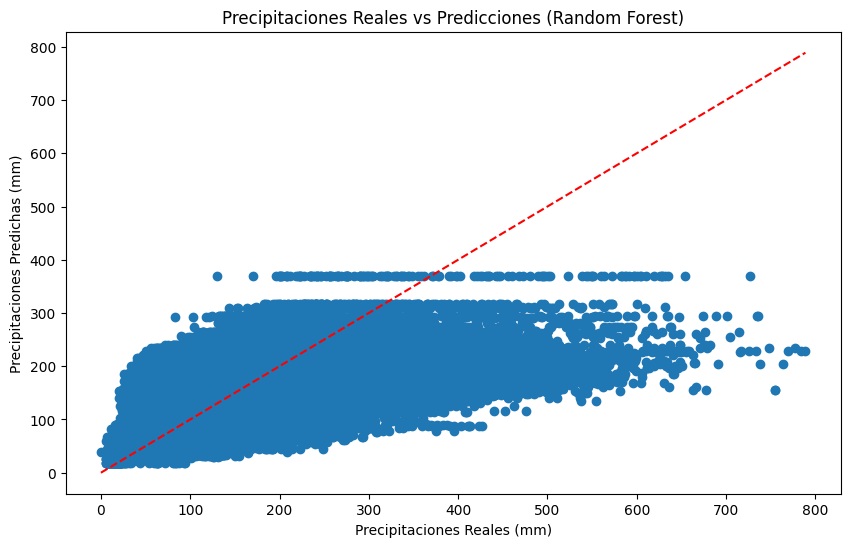

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

)

# Preprocesar los datos
# Convertir el mes en una variable cíclica (ya que los meses tienen una relación cíclica)
df_precipitaciones['sin_mes'] = np.sin(2 * np.pi * df_precipitaciones['month'] / 12)
df_precipitaciones['cos_mes'] = np.cos(2 * np.pi * df_precipitaciones['month'] / 12)

# Convertir los datos de año a variables numéricas
df_precipitaciones['year'] = df_precipitaciones['year'].astype(int)

# Variables dependientes e independientes
X = df_precipitaciones[['year', 'sin_mes', 'cos_mes']]
y = df_precipitaciones['precip']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Imprimir los resultados
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Graficar las precipitaciones reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.xlabel('Precipitaciones Reales (mm)')
plt.ylabel('Precipitaciones Predichas (mm)')
plt.title('Precipitaciones Reales vs Predicciones (Random Forest)')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Crear un dataframe con los datos mensuales de todos los municipios que conforman la provincia del Tundama
municipios_elegidos = ['Belén', 'Duitama', 'Busbanzá', 'Cerinza', 'Corrales', 'Floresta',
                       'Paipa', 'Santa Rosa De Viterbo', 'Tutazá']

# Lista para almacenar los dataframes
df_list = []

# Itera sobre cada municipio
for municipio_elegido in municipios_elegidos:
    # Filtra los datos para el municipio elegido
    df_municipio = df_precipitaciones[df_precipitaciones['municipality'] == municipio_elegido]

    # Excluir los datos del año 2023
    df_municipio = df_municipio[df_municipio['year'] != 2023]

    # Agrupar por municipio, año y mes, y sumar las precipitaciones
    precipitaciones_mensuales = df_municipio.groupby(['municipality', 'year', 'month'], as_index=False)['precip'].sum()

    # Reorganizar las columnas
    precipitaciones_mensuales = precipitaciones_mensuales[['municipality', 'year', 'month', 'precip']]

    # Preprocesar los datos: Convertir el mes en variables cíclicas (seno y coseno)
    precipitaciones_mensuales['sin_mes'] = np.sin(2 * np.pi * precipitaciones_mensuales['month'] / 12)
    precipitaciones_mensuales['cos_mes'] = np.cos(2 * np.pi * precipitaciones_mensuales['month'] / 12)

    # Seleccionar las características y la variable objetivo
    X = precipitaciones_mensuales[['year', 'sin_mes', 'cos_mes']]  # Características
    y = precipitaciones_mensuales['precip']  # Variable objetivo (precipitación)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Inicializar y entrenar el modelo Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Realizar predicciones
    y_pred = rf.predict(X_test)

    # Evaluar el modelo: Calcular el RMSE y R²
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Imprimir los resultados de la evaluación
    print(f"Evaluación para el municipio de {municipio_elegido}:")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")
    print('-' * 50)

    # Añadir los resultados al dataframe
    df_completo1 = pd.concat([df_completo1, precipitaciones_mensuales], ignore_index=True)

# Mostrar el dataframe con los resultados completos
print(df_completo1)

Evaluación para el municipio de Belén:
RMSE: 256.3738822142934
R²: 0.45108120573539157
--------------------------------------------------
Evaluación para el municipio de Duitama:
RMSE: 328.01026216344565
R²: 0.4128461082864773
--------------------------------------------------
Evaluación para el municipio de Busbanzá:
RMSE: 34.37840564764459
R²: 0.42138797057582333
--------------------------------------------------
Evaluación para el municipio de Cerinza:
RMSE: 52.34597301945944
R²: 0.3405111710708655
--------------------------------------------------
Evaluación para el municipio de Corrales:
RMSE: 99.81756035514377
R²: 0.47041073306156744
--------------------------------------------------
Evaluación para el municipio de Floresta:
RMSE: 147.2087769945734
R²: 0.38476261311423987
--------------------------------------------------
Evaluación para el municipio de Paipa:
RMSE: 576.2418662629593
R²: 0.40804425854674486
--------------------------------------------------
Evaluación para el mun

Entrenando modelo para el municipio: Belén
Evaluación para Belén:
RMSE: 260.84
R²: 0.43


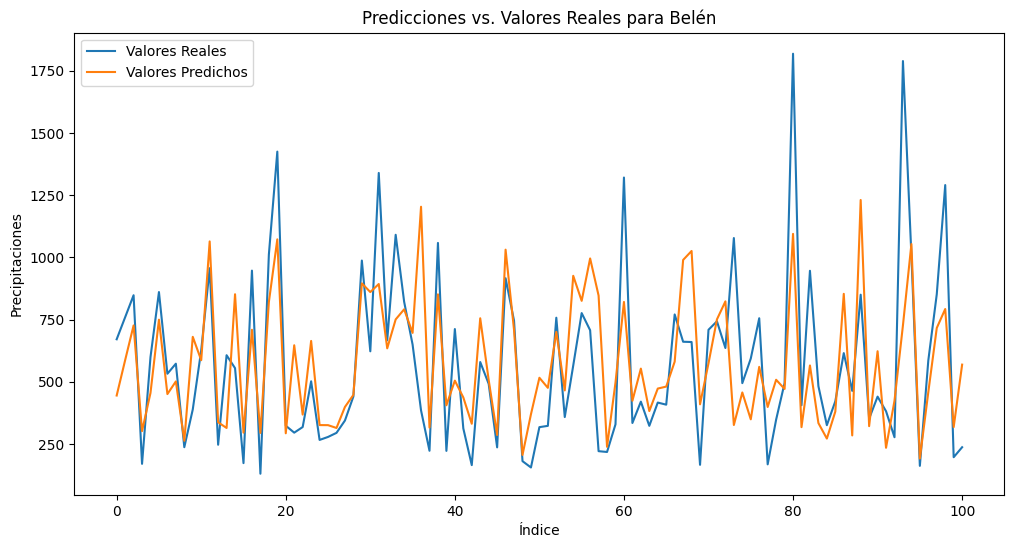

Entrenando modelo para el municipio: Duitama
Evaluación para Duitama:
RMSE: 317.16
R²: 0.45


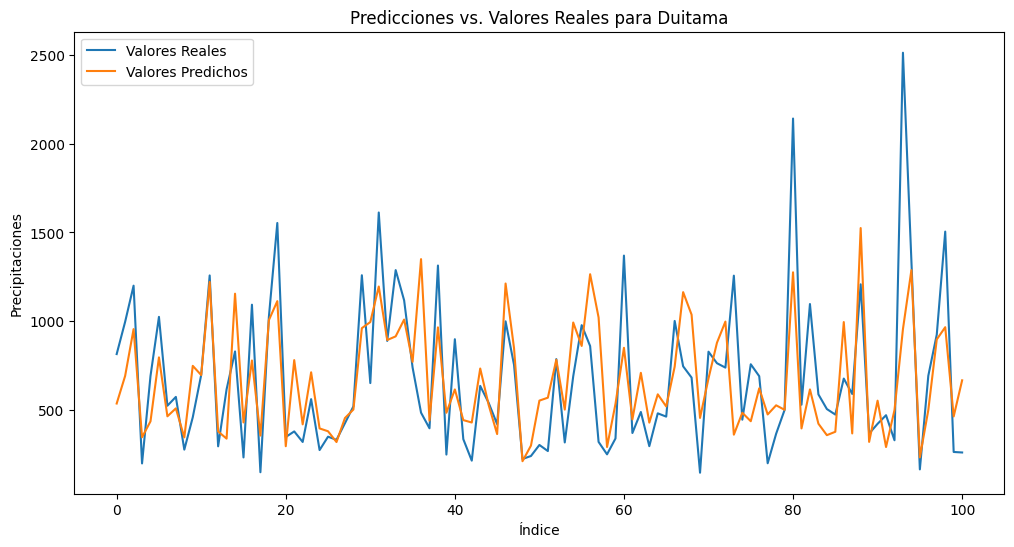

Entrenando modelo para el municipio: Busbanzá
Evaluación para Busbanzá:
RMSE: 34.52
R²: 0.42


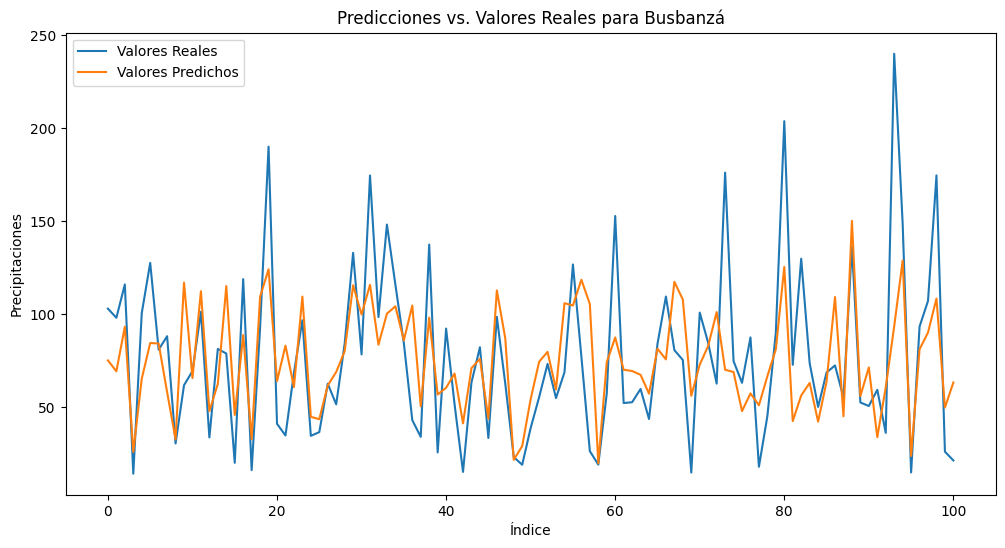

Entrenando modelo para el municipio: Cerinza
Evaluación para Cerinza:
RMSE: 52.11
R²: 0.35


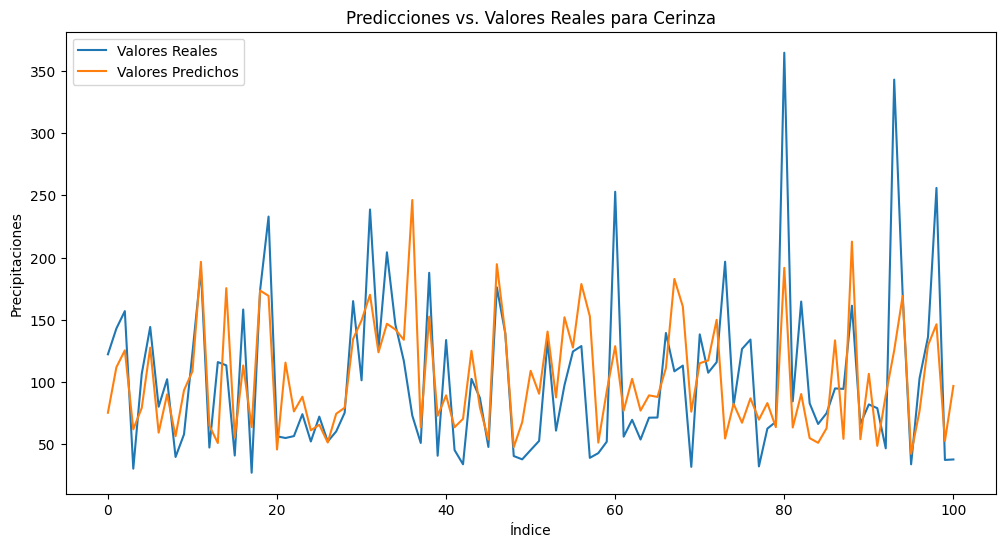

Entrenando modelo para el municipio: Corrales
Evaluación para Corrales:
RMSE: 99.84
R²: 0.47


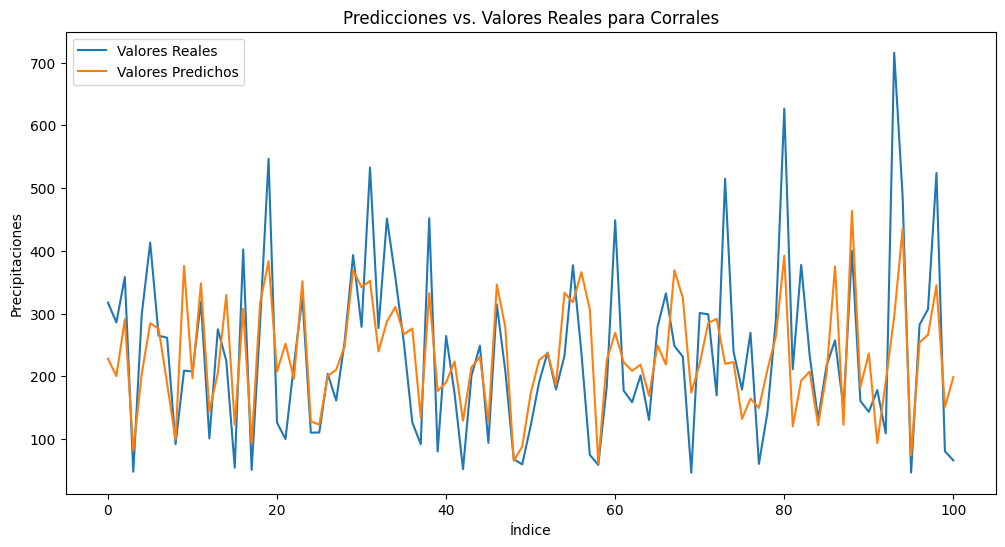

Entrenando modelo para el municipio: Floresta
Evaluación para Floresta:
RMSE: 146.31
R²: 0.39


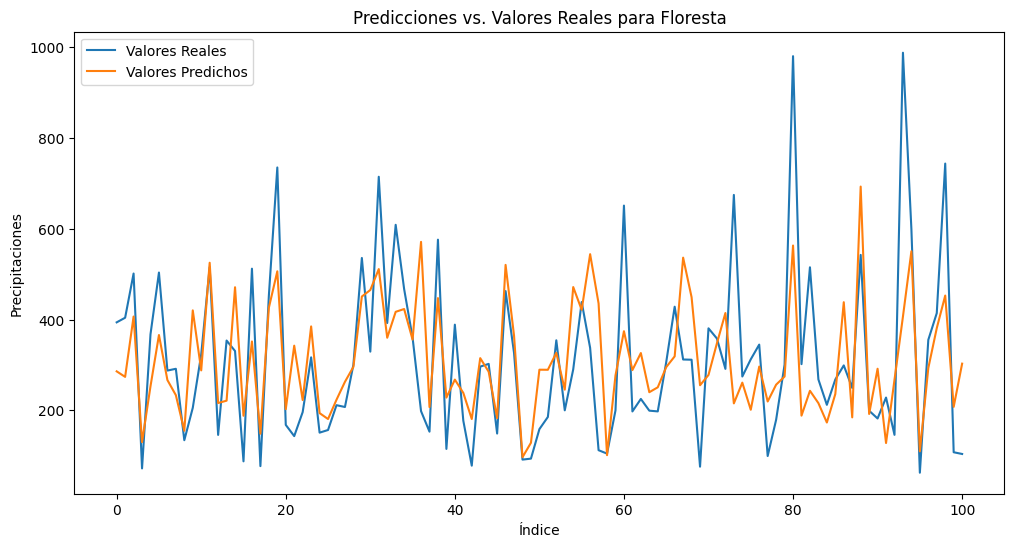

Entrenando modelo para el municipio: Paipa
Evaluación para Paipa:
RMSE: 552.30
R²: 0.46


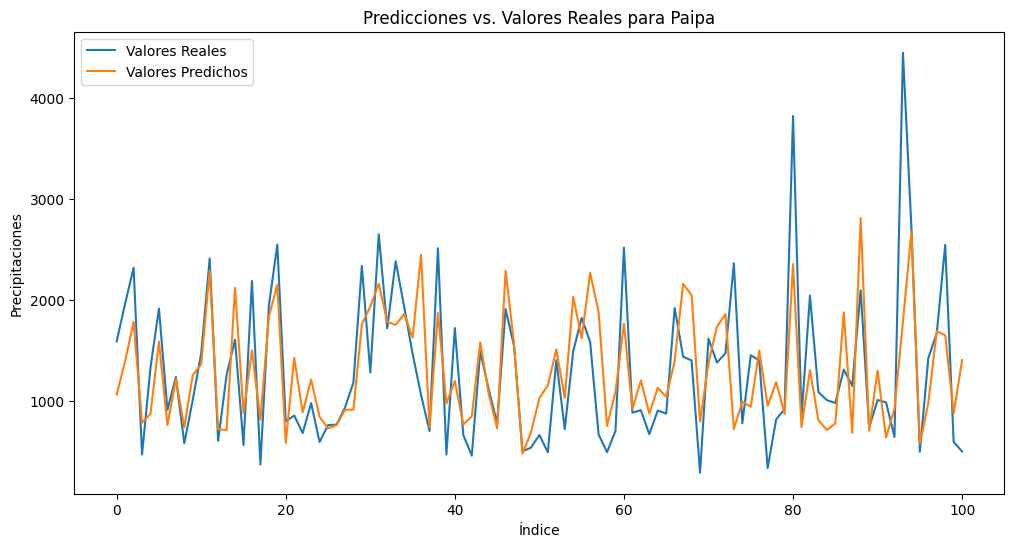

Entrenando modelo para el municipio: Santa Rosa De Viterbo
Evaluación para Santa Rosa De Viterbo:
RMSE: 117.92
R²: 0.38


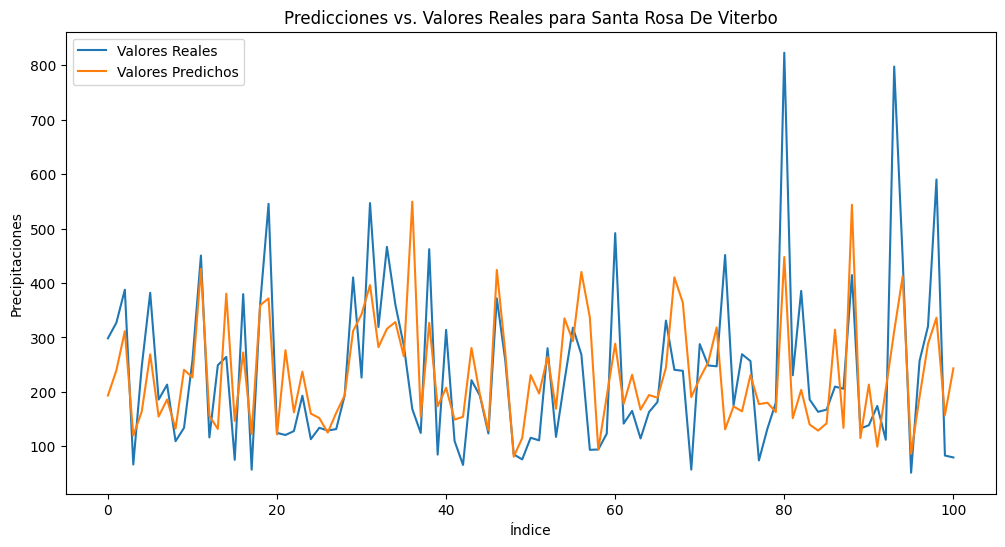

Entrenando modelo para el municipio: Tutazá
Evaluación para Tutazá:
RMSE: 125.18
R²: 0.48


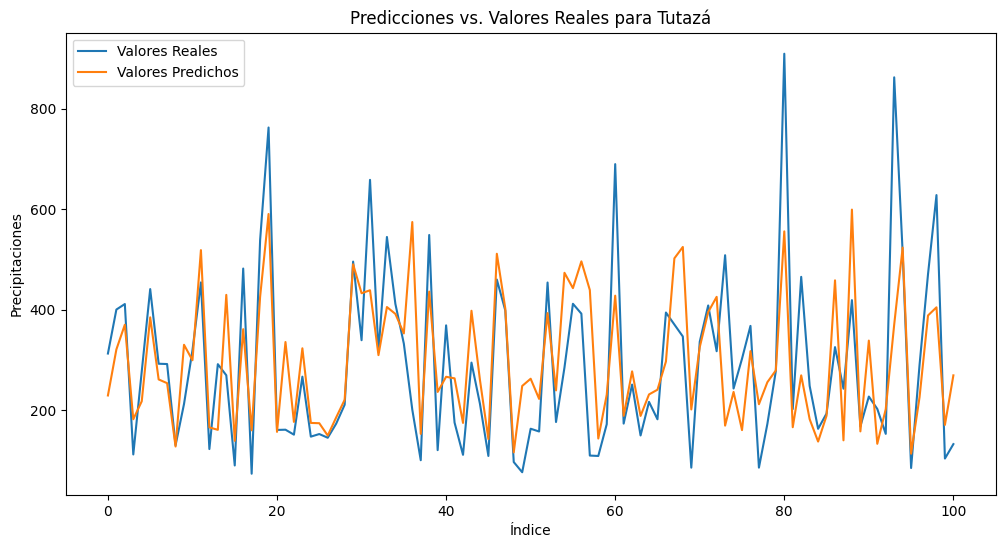

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear un dataframe con los datos mensuales de todos los municipios que conforman la provincia del Tundama
municipios_elegidos = ['Belén', 'Duitama', 'Busbanzá', 'Cerinza', 'Corrales', 'Floresta',
                       'Paipa', 'Santa Rosa De Viterbo', 'Tutazá']

# Lista para almacenar los dataframes
df_list = []

# Itera sobre cada municipio
for municipio_elegido in municipios_elegidos:
    # Filtra los datos para el municipio elegido
    df_municipio = df_precipitaciones[df_precipitaciones['municipality'] == municipio_elegido]

    # Excluir los datos del año 2023
    df_municipio = df_municipio[df_municipio['year'] != 2023]

    # Agrupar por municipio, año y mes, y sumar las precipitaciones
    precipitaciones_mensuales = df_municipio.groupby(['municipality', 'year', 'month'], as_index=False)['precip'].sum()

    # Reorganizar las columnas
    precipitaciones_mensuales = precipitaciones_mensuales[['municipality', 'year', 'month', 'precip']]

    # Añadir el dataframe a la lista
    df_list.append(precipitaciones_mensuales)

# Combina todos los dataframes en uno solo
df_completo1 = pd.concat(df_list, ignore_index=True)

# Preprocesar los datos
# Convertir el mes en una variable cíclica (sin y coseno)
df_completo1['sin_mes'] = np.sin(2 * np.pi * df_completo1['month'] / 12)
df_completo1['cos_mes'] = np.cos(2 * np.pi * df_completo1['month'] / 12)

# Entrenamiento del modelo para cada municipio
for municipio in municipios_elegidos:
    print(f"Entrenando modelo para el municipio: {municipio}")

    # Filtrar los datos para el municipio actual
    df_municipio = df_completo1[df_completo1['municipality'] == municipio]

    # Definir las características (X) y la variable objetivo (y)
    X = df_municipio[['year', 'month', 'sin_mes', 'cos_mes']]  # Características
    y = df_municipio['precip']  # Variable objetivo (precipitaciones)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear el modelo de Random Forest
    model = RandomForestRegressor(n_estimators=200)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar el modelo
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R² Score

    print(f"Evaluación para {municipio}:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.2f}")

# Crear la figura y los ejes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar los valores reales vs. predichos
    ax.plot(range(len(y_test)), y_test, label='Valores Reales')
    ax.plot(range(len(y_test)), y_pred, label='Valores Predichos')

    # Agregar etiquetas y título
    ax.set_xlabel('Índice')
    ax.set_ylabel('Precipitaciones')
    ax.set_title(f'Predicciones vs. Valores Reales para {municipio}')
    ax.legend()

    # Mostrar el gráfico
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Crear un dataframe con los datos mensuales de todos los municipios que conforman la provincia del Tundama
municipios_elegidos = ['Belén', 'Duitama', 'Busbanzá', 'Cerinza', 'Corrales', 'Floresta',
                       'Paipa', 'Santa Rosa De Viterbo', 'Tutazá']

# Lista para almacenar los dataframes
df_list = []

# Itera sobre cada municipio
for municipio_elegido in municipios_elegidos:
    # Filtra los datos para el municipio elegido
    df_municipio = df_precipitaciones[df_precipitaciones['municipality'] == municipio_elegido]

    # Excluir los datos del año 2023
    df_municipio = df_municipio[df_municipio['year'] != 2023]

    # Agrupar por municipio, año y mes, y sumar las precipitaciones
    precipitaciones_mensuales = df_municipio.groupby(['municipality', 'year', 'month'], as_index=False)['precip'].sum()

    # Reorganizar las columnas
    precipitaciones_mensuales = precipitaciones_mensuales[['municipality', 'year', 'month', 'precip']]

    # Añadir el dataframe a la lista
    df_list.append(precipitaciones_mensuales)

# Combina todos los dataframes en uno solo
df_completo1 = pd.concat(df_list, ignore_index=True)

# Preprocesar los datos
# Convertir el mes en una variable cíclica (sin y coseno)
df_completo1['sin_mes'] = np.sin(2 * np.pi * df_completo1['month'] / 12)
df_completo1['cos_mes'] = np.cos(2 * np.pi * df_completo1['month'] / 12)

# Definir un diccionario para almacenar los modelos entrenados para cada municipio
modelos = {}

# Entrenamiento del modelo para cada municipio
for municipio in municipios_elegidos:
    #print(f"Entrenando modelo para el municipio: {municipio}")

    # Filtrar los datos para el municipio actual
    df_municipio = df_completo1[df_completo1['municipality'] == municipio]

    # Definir las características (X) y la variable objetivo (y)
    X = df_municipio[['year', 'month', 'sin_mes', 'cos_mes']]  # Características
    y = df_municipio['precip']  # Variable objetivo (precipitaciones)

    # Dividir los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear el modelo de Random Forest
    model = RandomForestRegressor(n_estimators=200)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Guardar el modelo entrenado para cada municipio
    modelos[municipio] = model


# Función para hacer predicciones basadas en la entrada del usuario
def hacer_prediccion(municipio, año, mes):
    # Verificar si el municipio está en los modelos entrenados
    if municipio not in modelos:
        print(f"El municipio {municipio} no está disponible en el modelo.")
        return

    # Convertir el mes en una variable cíclica (sin y coseno)
    sin_mes = np.sin(2 * np.pi * mes / 12)
    cos_mes = np.cos(2 * np.pi * mes / 12)

    # Preparar las características para la predicción
    X_input = np.array([[año, mes, sin_mes, cos_mes]])

    # Realizar la predicción usando el modelo entrenado
    prediccion = modelos[municipio].predict(X_input)

    # Mostrar la predicción
    print(f"La predicción de precipitaciones para {municipio} en {año}-{mes} es: {prediccion[0]:.2f} mm")

# Solicitar al usuario el año y el mes para la predicción
municipio_usuario = input("Introduce el municipio: ")
año_usuario = int(input("Introduce el año: "))
mes_usuario = int(input("Introduce el mes (1-12): "))

# Realizar la predicción
hacer_prediccion(municipio_usuario, año_usuario, mes_usuario)

Introduce el municipio: Duitama
Introduce el año: 2024
Introduce el mes (1-12): 11
La predicción de precipitaciones para Duitama en 2024-11 es: 936.37 mm


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
